# 相关性研究

已完成2024.4.2

## 模拟案例测试

In [1]:
import pandas as pd
import numpy as np

# 假设你有一个DataFrame，其中包含了10只股票的数据
# 每一列代表一只股票，行索引是日期
# 例如：
data = {
    'Stock1': [1, 2, 3, 4, 5],
    'Stock2': [5, 4, 3, 2, 1],
    'Stock3': [2, 2, 2, 2, 2],
    # ... 其他股票数据
}
df = pd.DataFrame(data)

# 计算相关性矩阵
correlation_matrix = df.corr()

In [3]:
correlation_matrix

,Stock1,Stock2,Stock3
Stock1,1.0,-1.0,NaN
Stock2,-1.0,1.0,NaN
Stock3,NaN,NaN,NaN


In [5]:
df

,Stock1,Stock2,Stock3
0,1,5,2
1,2,4,2
2,3,3,2
3,4,2,2
4,5,1,2


# 真实代码测试

In [7]:
# 导入包
import pandas as pd
import akshare as ak
import streamlit as st
import riskfolio as rp
# 在matplotlib绘图中显示中文和负号
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"] # 设置字体
plt.rcParams['axes.unicode_minus'] = False   # 解决坐标轴负数的负号显示问题

In [9]:
# 引入函数
def get_fund_info(sw_index_list,year, return_fund_df=False):

    fund_df = pd.DataFrame()
    # 逐个获取指数行情数据
    i = 0
    for code in sw_index_list:
        bars = ak.fund_individual_basic_info_xq(symbol=code)
        bars.index = bars['item']
        fund_df[code] = bars['value']
        i += 1
        print(f"\r已获取[{i}/{len(sw_index_list)}]支基金的数据", end="")  # 输出处理进度
    fund_df.columns = sw_index_list

    # 获取某一年之前的基金列表
    fund_df_filtered = fund_df.loc['成立时间']
    # 将Series转换为DataFrame
    df = fund_df_filtered.reset_index()
    df.columns = ['index', 'date']
    # 将日期字符串转换为datetime对象
    df['date'] = pd.to_datetime(df['date'])
    df_before_data = df[df['date'].dt.year < year]

    # 输出最后的列表
    index_list = df_before_data['index'].tolist()

    if return_fund_df:
        return fund_df, index_list
    else:
        return index_list


# 定义函数，获取基金价格数据
def get_fund_price(index_list):
    price_df = pd.DataFrame()
    # 逐个获取指数行情数据
    i = 0
    for code in index_list:
        bars = ak.fund_open_fund_info_em(symbol=code, indicator="累计净值走势")
        bars['净值日期'] = pd.to_datetime(bars['净值日期']).dt.strftime('%Y-%m-%d')
        bars.index = pd.to_datetime(bars['净值日期'])
        price_df[code] = bars['累计净值']
        i += 1
        print("\r已获取[{}/{}]支基金的数据".format(i, len(index_list)), end="")  # 输出处理进度
    price_df.columns = index_list

    return price_df

In [12]:
# 确定要分析的股票
sw_index_list = ['040046',
                     '007380',
                     '015016',
                     '013308',
                     '162411',
                     '160416',
                     '000369',
                     '005613',
                     '007721',
                     '008763',
                     '001668', # 汇添富全球互联混合（和纳100相关性太高）
                     '006282',
                     '000043', # 嘉实美国成长（和纳100相关性太高）
                     '164701',
                     '164824', # 印度（目前暂停买入）
                     '519191',
                     '000893', # 工银创新动力
                     '001593',
                     ]

In [13]:
year = 2024
fund_df, index_list = get_fund_info(sw_index_list,year, return_fund_df=True)

已获取[18/18]支基金的数据

In [53]:
fund_df.index

Index(['基金代码', '基金名称', '基金全称', '成立时间', '最新规模', '基金公司', '基金经理', '托管银行', '基金类型',
       '评级机构', '基金评级', '投资策略', '投资目标', '业绩比较基准'],
      dtype='object', name='item')

In [14]:
price_df = get_fund_price(index_list)

已获取[18/18]支基金的数据

In [15]:
price_df

,040046,007380,015016,013308,162411,160416,000369,005613,007721,008763,001668,006282,000043,164701,164824,519191,000893,001593
净值日期,,,,,,,,,,,,,,,,,,
2013-08-02,1.000,NaN,NaN,NaN,1.0770,1.073,NaN,NaN,NaN,NaN,NaN,NaN,1.039,0.682,NaN,NaN,NaN,NaN
2013-08-09,1.001,NaN,NaN,NaN,1.0610,1.068,NaN,NaN,NaN,NaN,NaN,NaN,1.026,0.687,NaN,NaN,NaN,NaN
2013-08-16,1.001,NaN,NaN,NaN,1.0380,1.063,NaN,NaN,NaN,NaN,NaN,NaN,1.007,0.720,NaN,NaN,NaN,NaN
2013-08-23,1.002,NaN,NaN,NaN,1.0480,1.063,NaN,NaN,NaN,NaN,NaN,NaN,1.015,0.734,NaN,NaN,NaN,NaN
2013-08-26,1.002,NaN,NaN,NaN,1.0490,1.061,NaN,NaN,NaN,NaN,NaN,NaN,1.013,0.737,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,5.639,1.0349,1.514,0.8767,0.8374,1.754,2.435,1.2433,1.6814,1.4784,3.363,1.4007,4.247,0.935,1.4464,2.3979,1.028,0.7374
2024-03-26,5.615,1.0398,1.525,0.8845,0.8268,1.743,2.439,1.2393,1.6782,1.4960,3.346,1.4070,4.225,0.936,1.4496,2.3532,1.029,0.7405
2024-03-27,5.635,1.0335,1.531,0.8653,0.8393,1.754,2.464,1.2639,1.6848,1.4984,3.320,1.4075,4.229,0.942,1.4580,2.3417,1.020,0.7208


In [18]:
# 计算相关性矩阵
correlation_matrix = price_df.corr()

In [19]:
correlation_matrix

,040046,007380,015016,013308,162411,160416,000369,005613,007721,008763,001668,006282,000043,164701,164824,519191,000893,001593
040046,1.000000,0.123639,0.813582,-0.345114,-0.320782,0.584922,0.964280,0.340614,0.945565,0.692390,0.931527,0.828174,0.998053,0.838311,0.840248,0.840298,0.091766,0.473179
007380,0.123639,1.000000,-0.535990,0.778274,-0.373700,-0.444902,-0.260683,-0.033581,-0.082400,0.266868,0.531646,0.165564,0.060182,-0.211029,-0.086643,-0.439379,0.089823,0.893029
015016,0.813582,-0.535990,1.000000,-0.188418,0.350143,0.674755,0.826487,0.144883,0.866581,0.143600,0.828719,0.993205,0.812407,0.929616,0.697478,0.528465,0.741792,-0.741055
013308,-0.345114,0.778274,-0.188418,1.000000,-0.282105,-0.388036,-0.366353,0.036929,-0.379477,0.160388,-0.346008,-0.219334,-0.389872,-0.221505,-0.539452,-0.571208,0.164238,0.584239
162411,-0.320782,-0.373700,0.350143,-0.282105,1.000000,0.467582,-0.269815,0.263596,0.786261,0.432104,-0.038355,0.500091,-0.305827,-0.139502,0.726502,-0.039510,0.449191,-0.211824
160416,0.584922,-0.444902,0.674755,-0.388036,0.467582,1.000000,0.657100,0.358478,0.805441,0.383795,0.349688,0.595491,0.610991,0.549636,0.832157,0.772110,0.223065,-0.001819
000369,0.964280,-0.260683,0.826487,-0.366353,-0.269815,0.657100,1.000000,0.334120,0.915165,0.457080,0.785331,0.732297,0.970033,0.838870,0.860132,0.898404,0.076257,0.367566
005613,0.340614,-0.033581,0.144883,0.036929,0.263596,0.358478,0.334120,1.000000,0.491641,0.869753,0.155938,0.539223,0.374393,0.017740,0.532247,0.164781,0.256465,0.166025
007721,0.945565,-0.082400,0.866581,-0.379477,0.786261,0.805441,0.915165,0.491641,1.000000,0.675587,0.596865,0.844005,0.971541,0.464378,0.953022,0.712926,0.864720,0.005450
008763,0.692390,0.266868,0.143600,0.160388,0.432104,0.383795,0.457080,0.869753,0.675587,1.000000,0.430592,0.711031,0.684409,-0.226995,0.692833,0.123207,0.609873,0.395768


# 可视化相关性

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
# jupyternotebook里需添加
%matplotlib inline

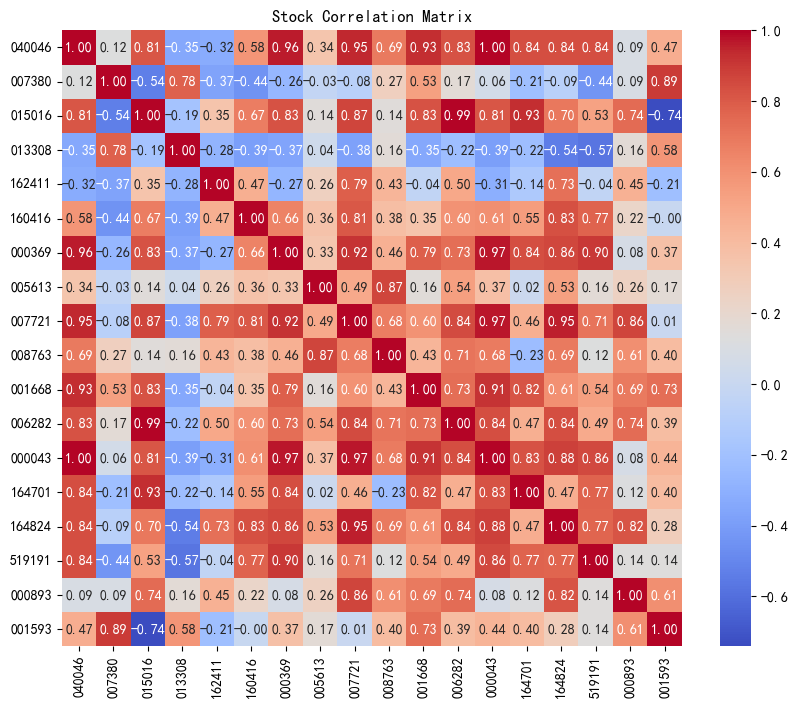

In [31]:
# 使用seaborn绘制相关性矩阵的热图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=correlation_matrix.columns.values,
            yticklabels=correlation_matrix.columns.values)

plt.title('Stock Correlation Matrix')
plt.show()

## 提取相关性较大的

In [32]:
# 找出相关性大于0.8的股票对
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# 打印相关性大于0.8的股票对
for pair in high_correlation_pairs:
    print(f"相关性大于0.9的股票对: {pair[0]} 和 {pair[1]}")

相关性大于0.9的股票对: 040046 和 000369
相关性大于0.9的股票对: 040046 和 007721
相关性大于0.9的股票对: 040046 和 001668
相关性大于0.9的股票对: 040046 和 000043
相关性大于0.9的股票对: 015016 和 006282
相关性大于0.9的股票对: 015016 和 164701
相关性大于0.9的股票对: 000369 和 007721
相关性大于0.9的股票对: 000369 和 000043
相关性大于0.9的股票对: 007721 和 000043
相关性大于0.9的股票对: 007721 和 164824
相关性大于0.9的股票对: 001668 和 000043


In [33]:
high_correlation_pairs

[('040046', '000369'),
 ('040046', '007721'),
 ('040046', '001668'),
 ('040046', '000043'),
 ('015016', '006282'),
 ('015016', '164701'),
 ('000369', '007721'),
 ('000369', '000043'),
 ('007721', '000043'),
 ('007721', '164824'),
 ('001668', '000043')]

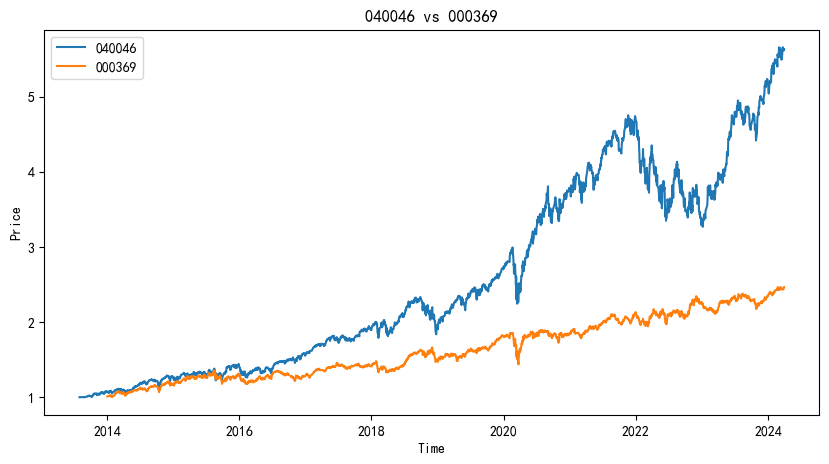

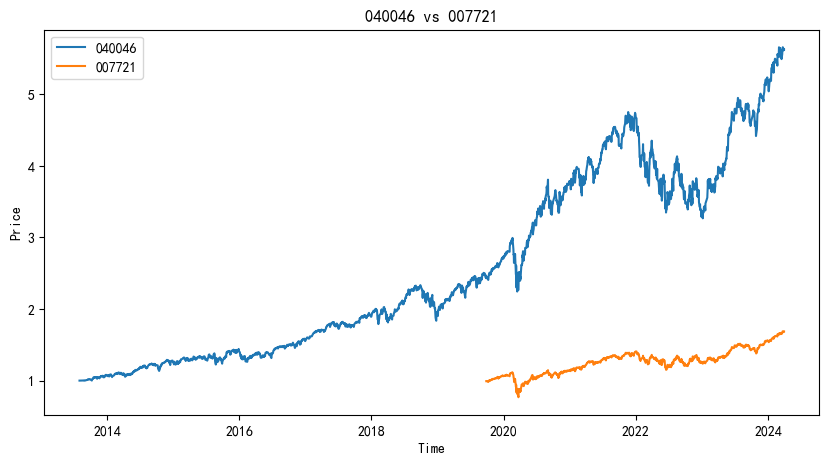

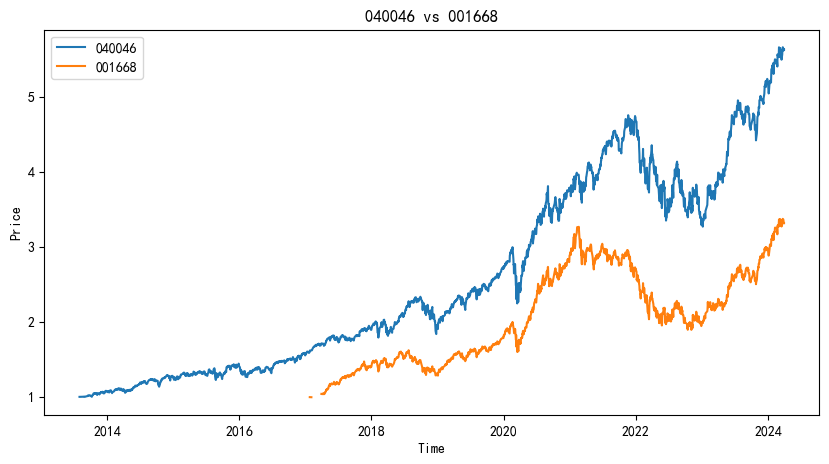

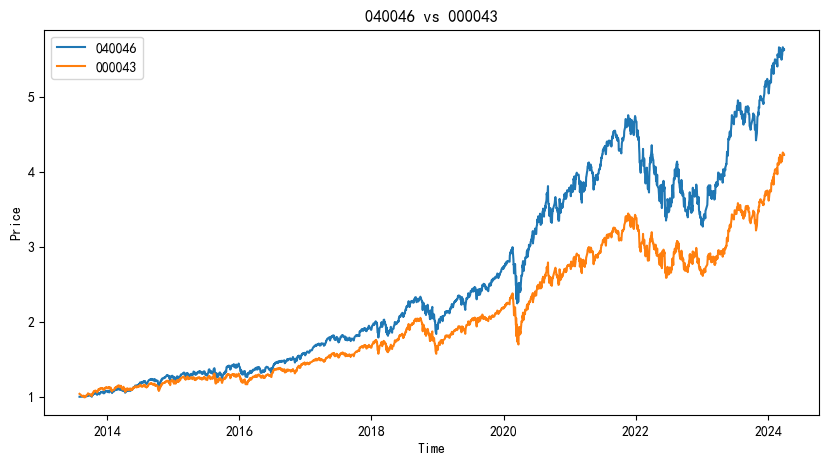

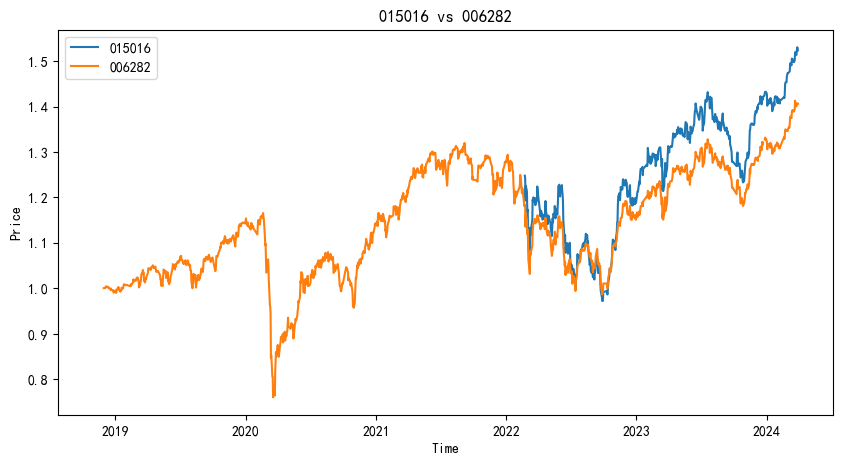

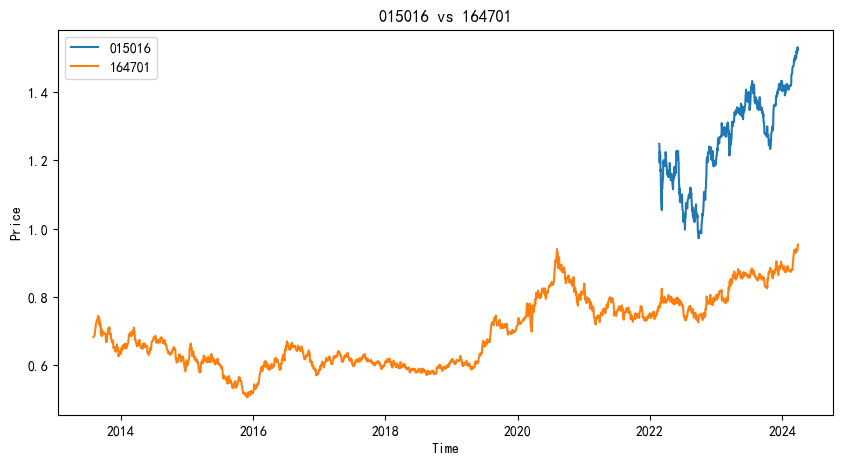

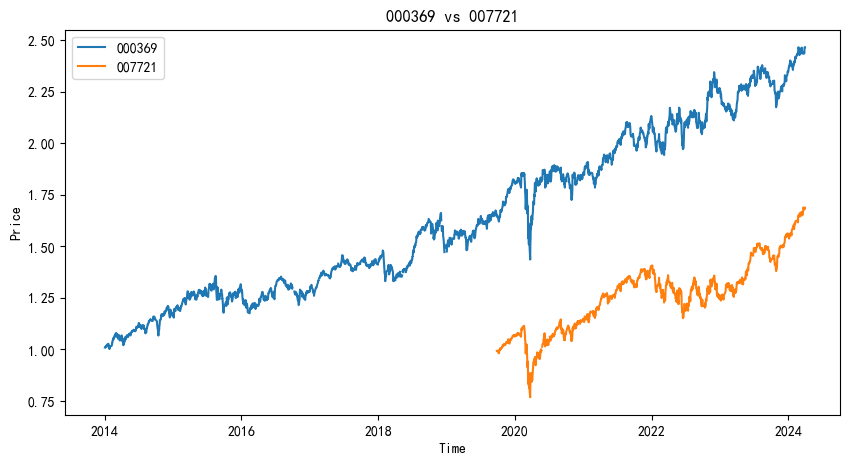

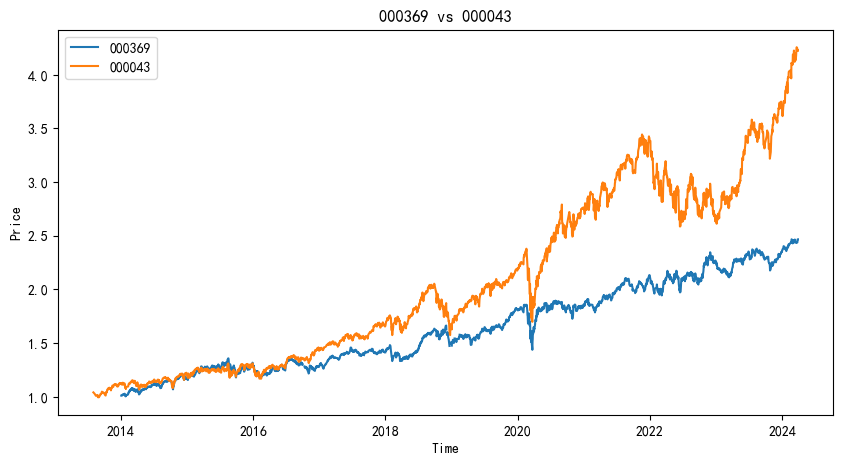

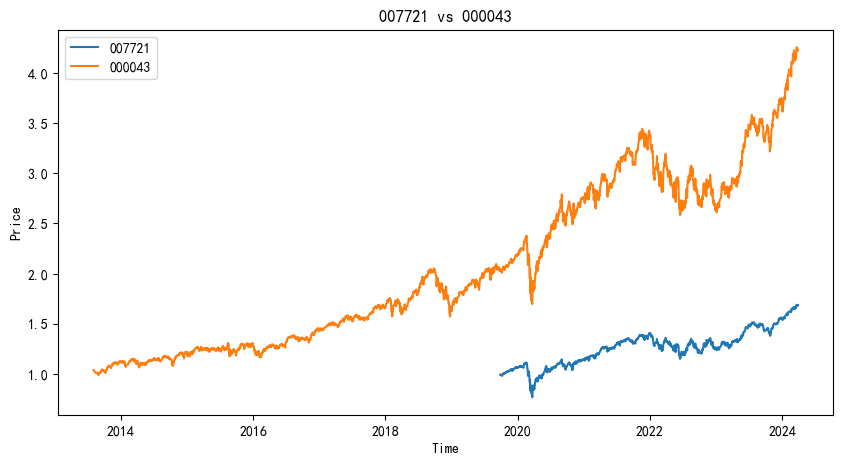

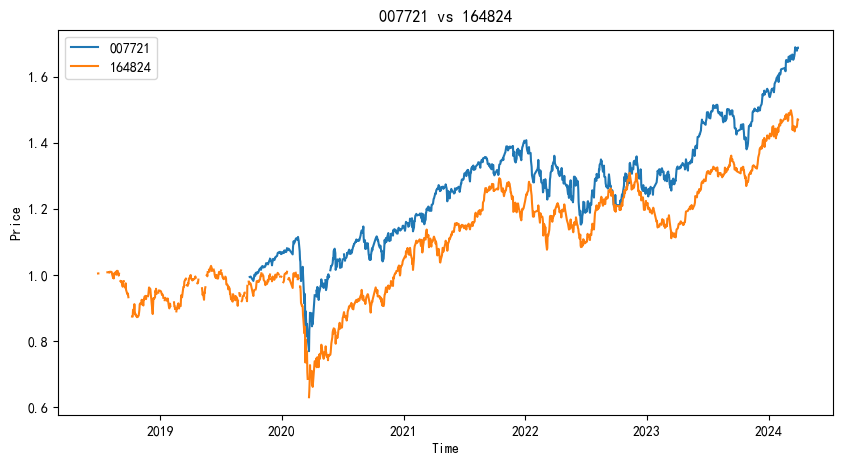

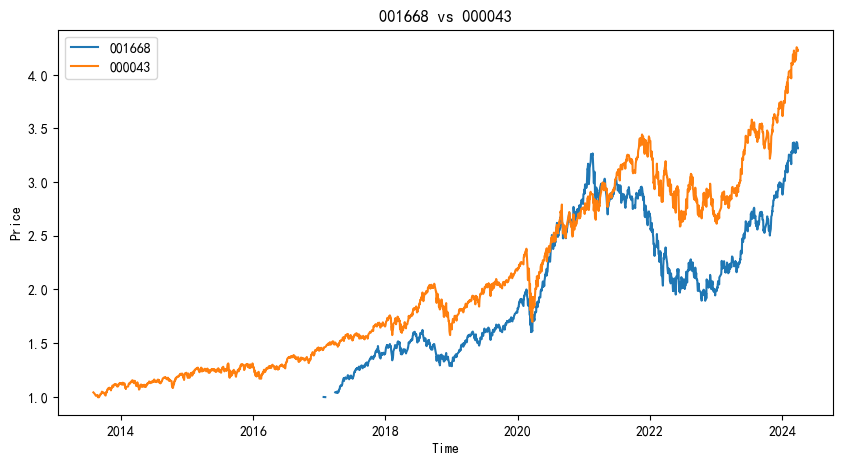

In [37]:
# 为每个相关性高的股票对绘制折线图
for stock1, stock2 in high_correlation_pairs:
    plt.figure(figsize=(10, 5))
    plt.plot(price_df[stock1], label=stock1)
    plt.plot(price_df[stock2], label=stock2)
    plt.title(f'{stock1} vs {stock2}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [38]:
fund_name=fund_df.loc['基金名称'].pipe(pd.DataFrame)

In [42]:
fund_name

,基金名称
040046,华安纳斯达克100指数A
007380,易方达上证50ETF联接发起式C
015016,华安国际龙头（DAX）ETF联接C
013308,易方达恒生科技ETF联接（QDII）A
162411,华宝标普油气上游股票人民币A
160416,华安标普全球石油指数
000369,广发全球医疗保健
005613,摩根富时发达市场REITs(QDII)人民币A
007721,天弘标普500（QDII-FOF）A
008763,天弘越南市场股票A


In [48]:
fund_name = fund_name.rename_axis("股票代码")
fund_name.reset_index(inplace=True)

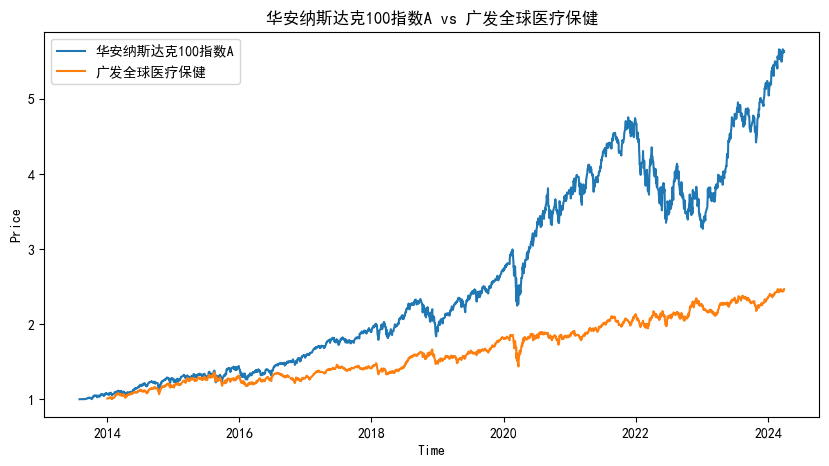

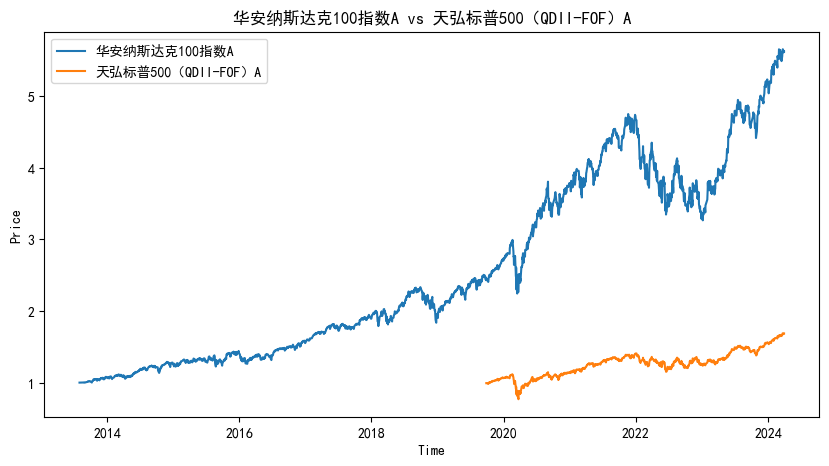

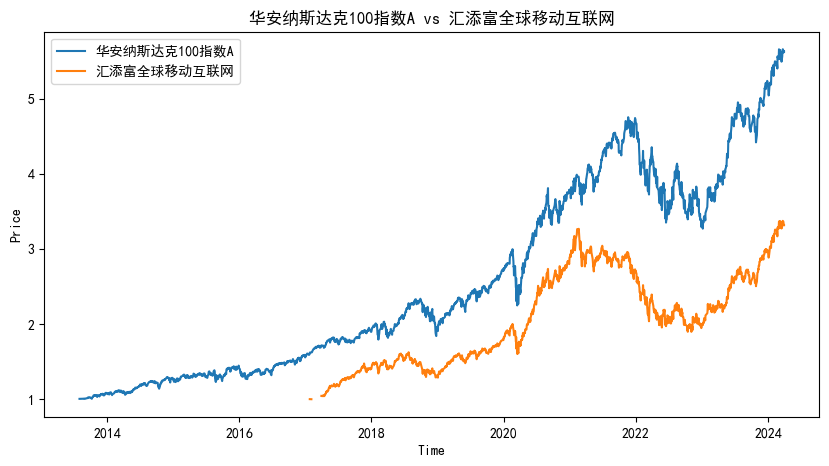

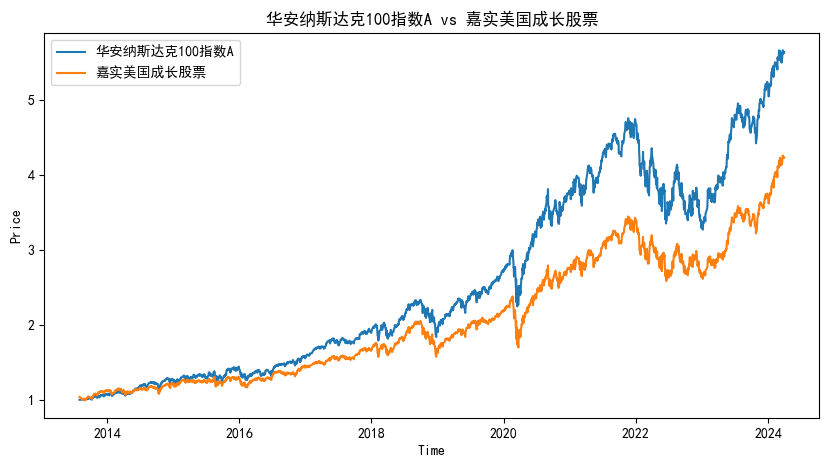

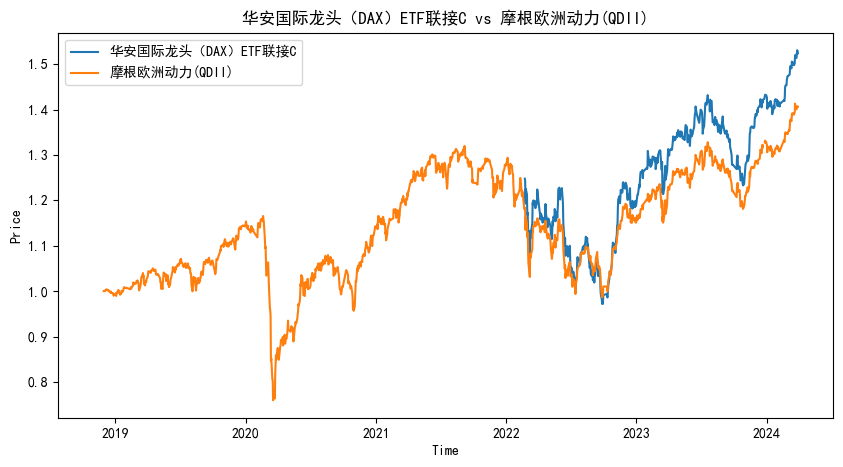

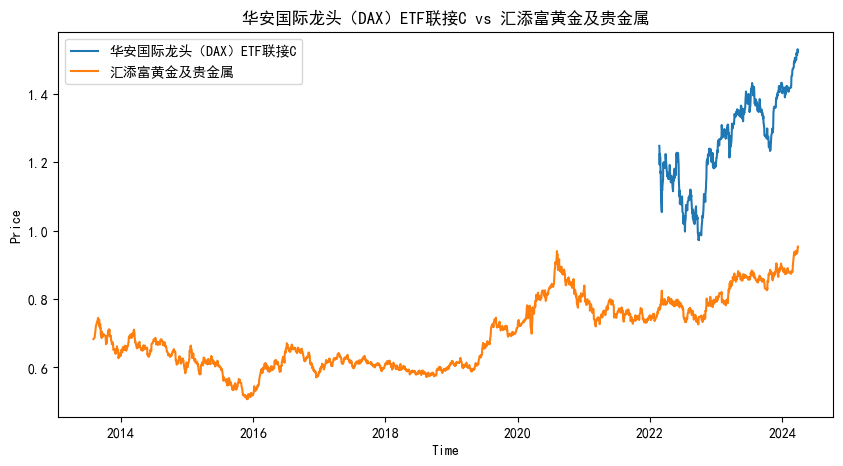

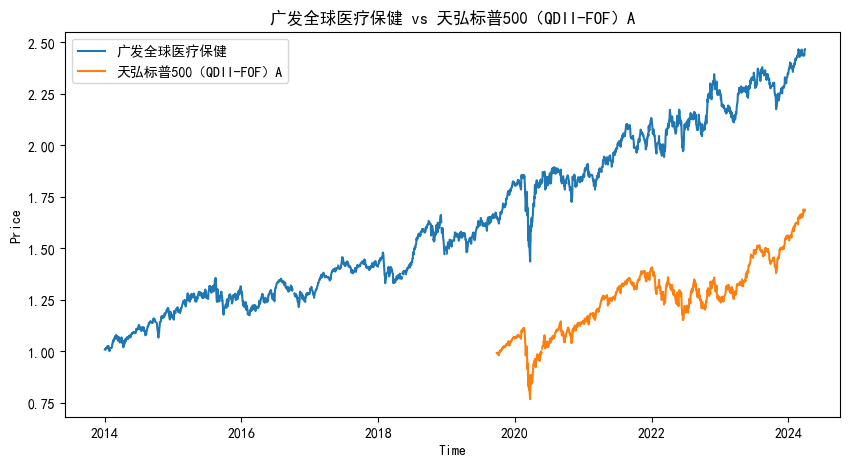

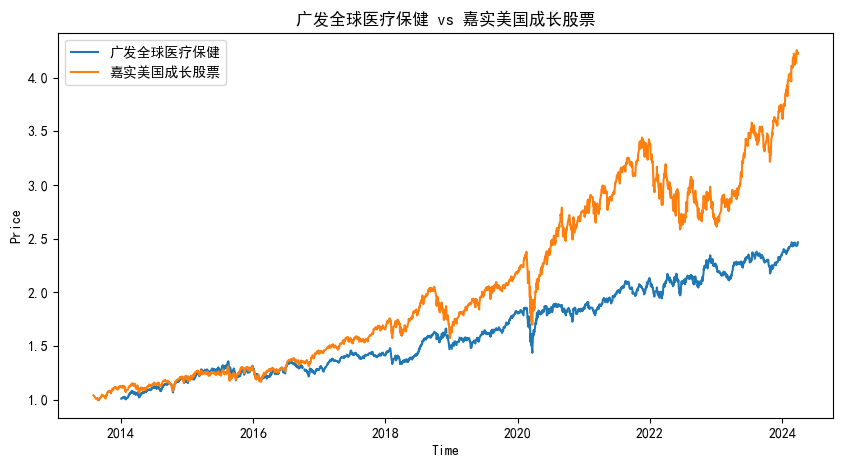

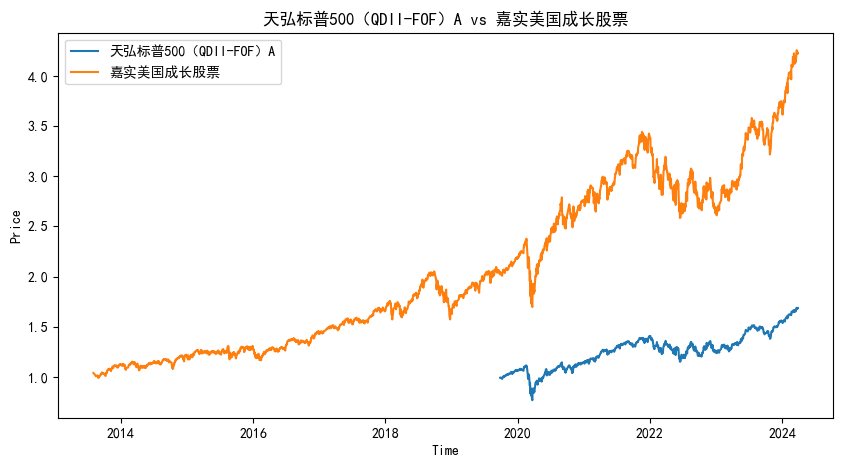

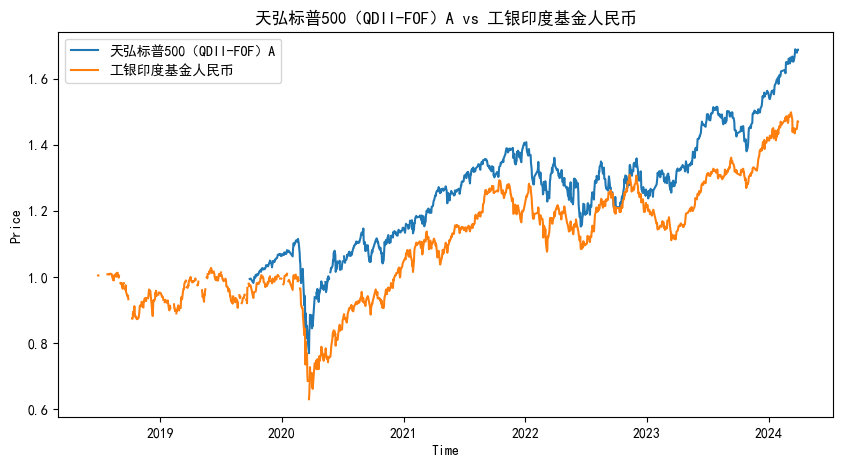

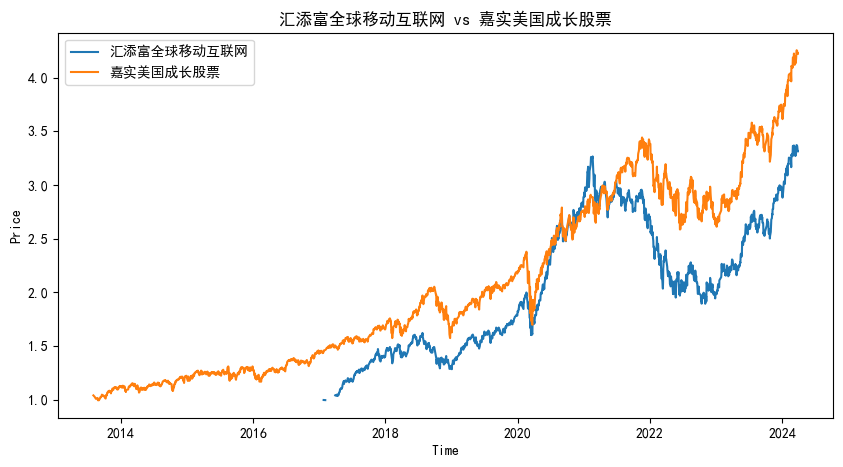

In [50]:
import matplotlib.pyplot as plt

# 假设 fund_name 是一个 DataFrame，它有两列：'基金名称' 和 '股票代码'
# 创建一个字典来映射股票代码到基金名称
stock_to_fund_name = fund_name.set_index('股票代码')['基金名称'].to_dict()

# 为每个相关性高的股票对绘制折线图
for stock1, stock2 in high_correlation_pairs:
    plt.figure(figsize=(10, 5))
    fund_name1 = stock_to_fund_name.get(stock1, stock1)
    fund_name2 = stock_to_fund_name.get(stock2, stock2)
    plt.plot(price_df[stock1], label=fund_name1)
    plt.plot(price_df[stock2], label=fund_name2)
    plt.title(f'{fund_name1} vs {fund_name2}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()